In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
import datetime as dt
from datetime import datetime


In [2]:
# 1.1
Sig_Eqs = pd.read_csv("earthquakes-2023-11-01_21-39-55_+0800.tsv",sep = "\t",engine = "python")

In [3]:
# Use total_0 to define the total number of deaths caused by earthquakes since 2150 B.C. in each country
total_0 = Sig_Eqs.groupby(["Country"]).sum()["Deaths"]
total_0.sort_values(ascending = False).head(10)

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/3709974393.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_0 = Sig_Eqs.groupby(["Country"]).sum()["Deaths"]


Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/4200764852.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_1 = Sig_Eqs.loc[Sig_Eqs["Mag"] > 6.0].groupby(["Year"]).sum()["Number"]


<Axes: xlabel='Year'>

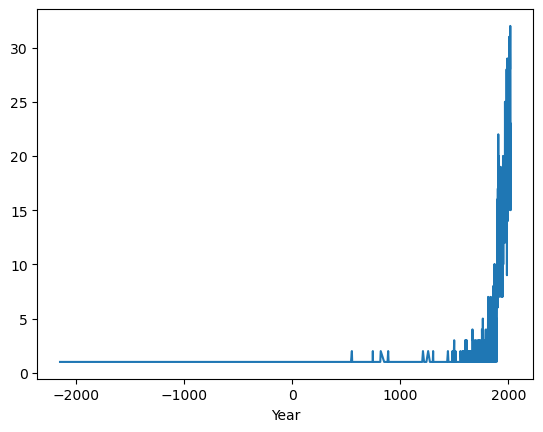

In [4]:
# 1.2
# Use total_1 to define the total number of earthquakes with magnitude larger than 6.0
Sig_Eqs["Number"] = 1
total_1 = Sig_Eqs.loc[Sig_Eqs["Mag"] > 6.0].groupby(["Year"]).sum()["Number"]
total_1.plot()

# trend：The advent of man has made severe earthquakes more frequent.

In [5]:
# 1.3(1)
def CountEq_LargestEq(country):
    country_data = Sig_Eqs[Sig_Eqs["Country"] == country]
    # Use total_2 to define the highest magnitude of the earthquakes
    total_2 = country_data.max()["Mag"]
    # Use total_3 to define the total number of earthquakes happened since 2150 B.C.
    total_3 = country_data.loc[Sig_Eqs["Mag"] > 0.0].sum()["Number"]
    return country, total_3, total_2

CountEq_LargestEq('JAPAN')



('JAPAN', 351, 9.1)

In [6]:
# 1.3(2)
# I asked my roommate for help, i can't print in descending order.
country_list = Sig_Eqs["Country"].unique()
total_list = []
for country in country_list:
    data = CountEq_LargestEq(country)
    total_list.append(data)
array = pd.DataFrame(total_list, columns=['Country', 'Number', 'Mag'])

print(array.sort_values('Number',ascending = False))

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/536031190.py:5: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_2 = country_data.max()["Mag"]
/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/536031190.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_3 = country_data.loc[Sig_Eqs["Mag"] > 0.0].sum()["Number"]
/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/536031190.py:5: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, 

                    Country  Number  Mag
15                    CHINA   589.0  8.5
34                    JAPAN   351.0  9.1
69                INDONESIA   331.0  9.1
8                      IRAN   259.0  7.9
53                      USA   223.0  9.2
..                      ...     ...  ...
107  BRITISH VIRGIN ISLANDS     0.0  NaN
111               SRI LANKA     0.0  NaN
112                 URUGUAY     0.0  NaN
114              MONTSERRAT     0.0  NaN
0                       NaN     0.0  NaN

[157 rows x 3 columns]


In [7]:
# 2
# I have trouble doing this question, so i seek help from my academic siblings~ qiming Liu. 
W = pd.read_csv('2281305.csv')
W

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/4038093125.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  W = pd.read_csv('2281305.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [8]:
wind_data = W[['DATE', 'WND']]
wind_data 

,DATE,WND
0,2010-01-02T00:00:00,"040,1,N,0020,1"
1,2010-01-02T01:00:00,"999,9,V,0010,1"
2,2010-01-02T02:00:00,"999,9,C,0000,1"
3,2010-01-02T03:00:00,"140,1,N,0010,1"
4,2010-01-02T04:00:00,"300,1,N,0040,1"
...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1"
111980,2020-09-11T18:00:00,"180,1,N,0040,1"
111981,2020-09-11T19:00:00,"220,1,V,0030,1"
111982,2020-09-11T20:00:00,"260,1,N,0030,1"


In [9]:
wind_data['Datetime'] = pd.to_datetime(wind_data['DATE'])
wind_data['Datetime']

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/160939049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['Datetime'] = pd.to_datetime(wind_data['DATE'])


0        2010-01-02 00:00:00
1        2010-01-02 01:00:00
2        2010-01-02 02:00:00
3        2010-01-02 03:00:00
4        2010-01-02 04:00:00
                 ...        
111979   2020-09-11 17:00:00
111980   2020-09-11 18:00:00
111981   2020-09-11 19:00:00
111982   2020-09-11 20:00:00
111983   2020-09-11 21:00:00
Name: Datetime, Length: 111984, dtype: datetime64[ns]

In [10]:
wind_data['WND']=wind_data['WND'].str[8:12]
wind_data

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/3061813429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['WND']=wind_data['WND'].str[8:12]


,DATE,WND,Datetime
0,2010-01-02T00:00:00,0020,2010-01-02 00:00:00
1,2010-01-02T01:00:00,0010,2010-01-02 01:00:00
2,2010-01-02T02:00:00,0000,2010-01-02 02:00:00
3,2010-01-02T03:00:00,0010,2010-01-02 03:00:00
4,2010-01-02T04:00:00,0040,2010-01-02 04:00:00
...,...,...,...
111979,2020-09-11T17:00:00,0030,2020-09-11 17:00:00
111980,2020-09-11T18:00:00,0040,2020-09-11 18:00:00
111981,2020-09-11T19:00:00,0030,2020-09-11 19:00:00
111982,2020-09-11T20:00:00,0030,2020-09-11 20:00:00


In [11]:
wind_data.set_index('Datetime', inplace = True)
wind_data['WND'] = wind_data['WND'].str.replace(' ', '').astype(float)

wind_data

/var/folders/c3/55ymwrj52kj8154jkhkb5_5w0000gp/T/ipykernel_72663/544279150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['WND'] = wind_data['WND'].str.replace(' ', '').astype(float)


,DATE,WND
Datetime,,
2010-01-02 00:00:00,2010-01-02T00:00:00,20.0
2010-01-02 01:00:00,2010-01-02T01:00:00,10.0
2010-01-02 02:00:00,2010-01-02T02:00:00,0.0
2010-01-02 03:00:00,2010-01-02T03:00:00,10.0
2010-01-02 04:00:00,2010-01-02T04:00:00,40.0
...,...,...
2020-09-11 17:00:00,2020-09-11T17:00:00,30.0
2020-09-11 18:00:00,2020-09-11T18:00:00,40.0
2020-09-11 19:00:00,2020-09-11T19:00:00,30.0


In [12]:
wind_data = wind_data[wind_data['WND'] != 9999]
monthly_avg_wind_speed = wind_data['WND'].resample('M').mean()

monthly_avg_wind_speed

Datetime
2010-01-31    27.562674
2010-02-28    33.880597
2010-03-31    33.606999
2010-04-30    31.913408
2010-05-31    32.936401
                ...    
2020-05-31    43.621984
2020-06-30    55.757997
2020-07-31    54.591398
2020-08-31    37.336077
2020-09-30    30.850187
Freq: M, Name: WND, Length: 129, dtype: float64

In [13]:
wind_data = wind_data[wind_data['WND'] != 9999]
monthly_avg_wind_speed = wind_data['WND'].resample('M').mean()

monthly_avg_wind_speed

Datetime
2010-01-31    27.562674
2010-02-28    33.880597
2010-03-31    33.606999
2010-04-30    31.913408
2010-05-31    32.936401
                ...    
2020-05-31    43.621984
2020-06-30    55.757997
2020-07-31    54.591398
2020-08-31    37.336077
2020-09-30    30.850187
Freq: M, Name: WND, Length: 129, dtype: float64

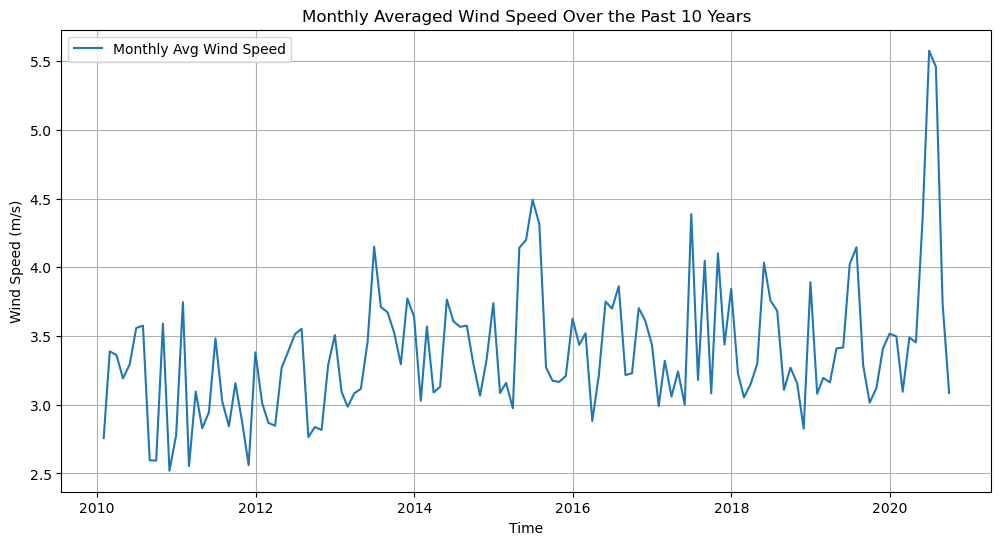

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_wind_speed.index, monthly_avg_wind_speed/10, label='Monthly Avg Wind Speed')
plt.title('Monthly Averaged Wind Speed Over the Past 10 Years')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()

In [15]:
# 3
data = pd.read_csv('data.csv')
data['TEMP']

0      85.1
1      85.6
2      83.0
3      78.3
4      87.7
       ... 
207    61.2
208    60.8
209    63.6
210    64.7
211    67.5
Name: TEMP, Length: 212, dtype: float64

In [16]:
data['DT'] = data['YEAR'].astype(str) + '-' + data['M'].astype(str) + '-' + data['D'].astype(str)
data['DT']=pd.to_datetime(data['DT'], format='%Y-%m-%d')
data['DT']
# The given data is not in the date format, so i have to break up the year, the month and the day, and then merge them into date format.For this part, my academic sibling Wangchao Zhao helped a lot.

0     2019-05-22
1     2019-05-23
2     2019-05-24
3     2019-05-25
4     2019-05-26
         ...    
207   2019-12-27
208   2019-12-28
209   2019-12-29
210   2019-12-30
211   2019-12-31
Name: DT, Length: 212, dtype: datetime64[ns]

In [17]:
T_data = data[['DT', 'TEMP']]
T_data 

,DT,TEMP
0,2019-05-22,85.1
1,2019-05-23,85.6
2,2019-05-24,83.0
3,2019-05-25,78.3
4,2019-05-26,87.7
...,...,...
207,2019-12-27,61.2
208,2019-12-28,60.8
209,2019-12-29,63.6
210,2019-12-30,64.7


<Axes: xlabel='DT'>

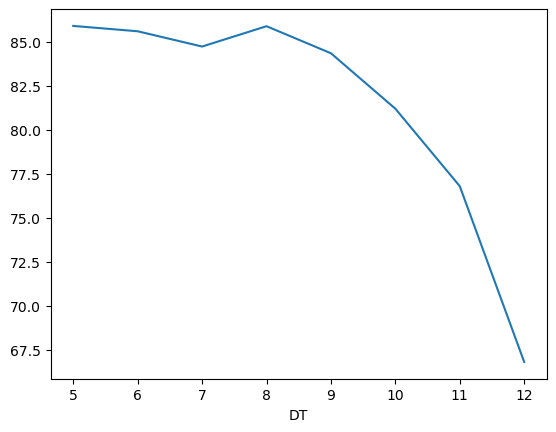

In [18]:
data = data[data['TEMP'] != -999]
day = data.groupby(data['DT'].dt.month)['TEMP'].mean()
day.plot()